# Titanic dataset exploration (kaggle)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


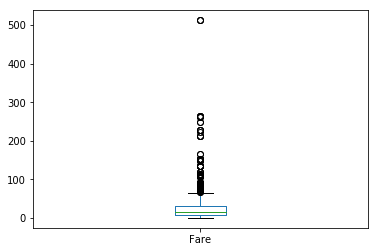

In [5]:
df.loc[:, 'Fare'].plot.box()

In [6]:
df.loc[:, 'Fare'].idxmax()

258

In [7]:
df.loc[258, :]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

# Sex differentiation
## How much male & female survived ?

In [8]:
df.loc[:, ('Sex', 'Survived')].groupby(by='Sex').sum()

,Survived
Sex,
female,233
male,109


In [9]:
df.loc[:, ('PassengerId', 'Sex')].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


In [10]:
(df.loc[:, ('Survived', 'Sex')]
.groupby('Sex').agg([np.sum, len])
.apply(lambda x:
       x['Survived']['sum'] / x['Survived']['len'], axis=1))

Sex
female    0.742038
male      0.188908
dtype: float64

## Viz of age for male & female (boxplots)

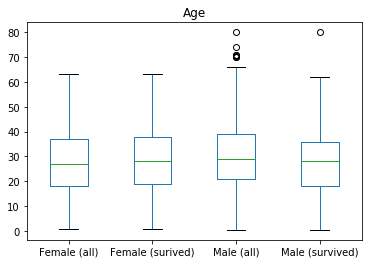

In [11]:
pd.DataFrame({
    'Male (all)': df[df['Sex'].isin(['male'])].loc[:, 'Age'],
    'Male (survived)': df[(df['Sex'].isin(['male'])) & (df['Survived'] == 1)].loc[:, 'Age'],
    'Female (all)': df[df['Sex'].isin(['female'])].loc[:, 'Age'],
    'Female (surived)': df[(df['Sex'].isin(['female'])) & (df['Survived'] == 1)].loc[:, 'Age']
}).plot.box(title='Age')

## How much male & female per class (barplot)

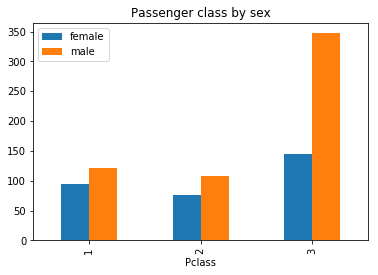

In [12]:
(pd.DataFrame({
    'male': df[df['Sex'].isin(['male'])].groupby('Pclass').agg(len).loc[:, 'PassengerId'],
    'female': df[df['Sex'].isin(['female'])].groupby('Pclass').agg(len).loc[:, 'PassengerId']})
 .plot.bar(title='Passenger class by sex'))

## Ticket fare by class

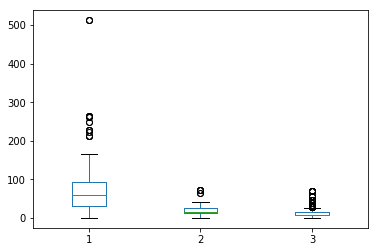

In [13]:
(pd.DataFrame({
    1: df[df['Pclass'] == 1].loc[:, 'Fare'],
    2: df[df['Pclass'] == 2].loc[:, 'Fare'],
    3: df[df['Pclass'] == 3].loc[:, 'Fare']})
 .plot.box())

## How much survived by class (stacked barplots)

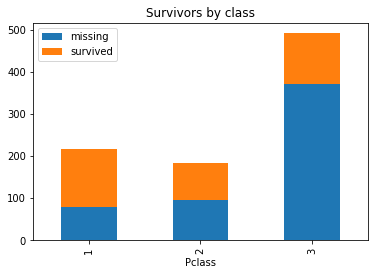

In [14]:
pd.DataFrame({
    'survived': df[df['Survived'] == 1].groupby('Pclass').agg(len).loc[:, 'PassengerId'],
    'missing': df[df['Survived'] == 0].groupby('Pclass').agg(len).loc[:, 'PassengerId']
}).plot.bar(title='Survivors by class', stacked=True)

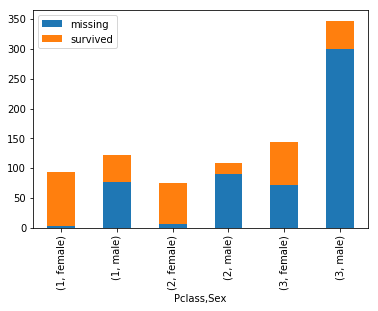

In [15]:
pd.DataFrame({
    'survived': df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).agg(len).loc[:, 'PassengerId'],
    'missing': df[df['Survived'] == 0].groupby(['Pclass', 'Sex']).agg(len).loc[:, 'PassengerId'],
}).plot.bar(stacked=True)

## Age boxplots for each {class, sex, survived}

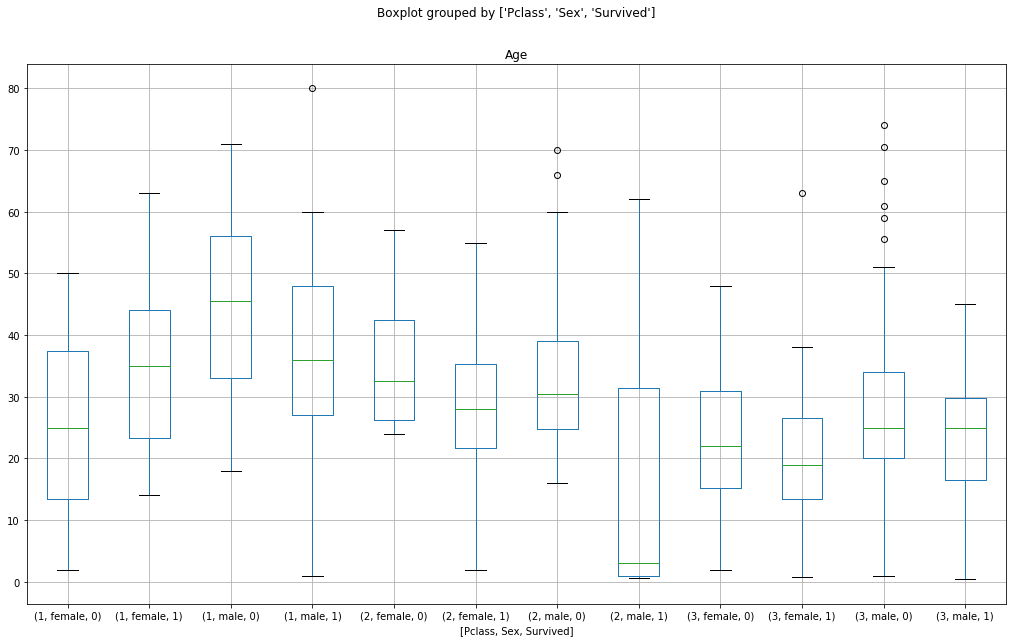

In [16]:
df.boxplot(column='Age', by=['Pclass', 'Sex', 'Survived'], figsize=(17, 10))

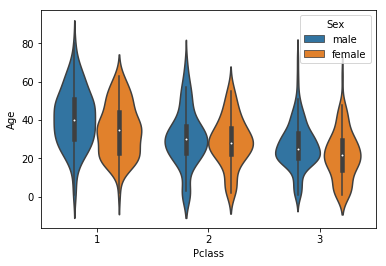

In [17]:
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=df)

## Diff in male / female per embarkation point (barplot)